In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


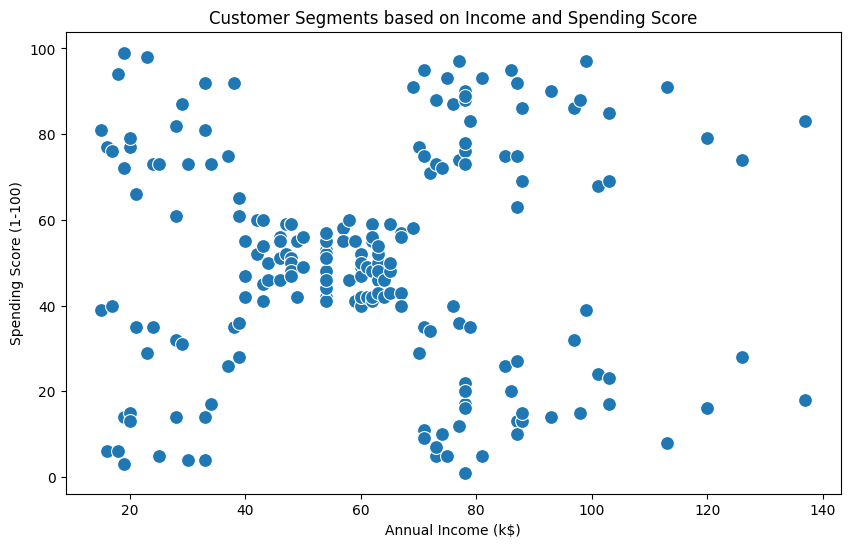

In [6]:
# Select the relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [8]:
# Scaling Values

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# The output is a NumPy array. For convenience, let's convert it back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled data:")
print(X_scaled.head())


First 5 rows of scaled data:
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


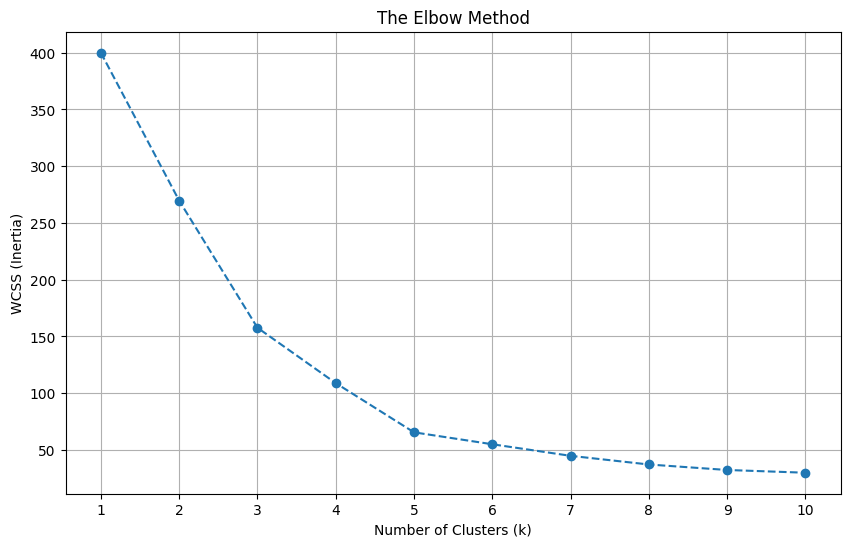

In [9]:
wcss = []
cluster_range = range(1, 11)  # We will test for 1 to 10 clusters

# Loop through each number of clusters
for i in cluster_range:
    # Initialize and fit the K-Means model
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Append the WCSS (inertia) to our list
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Here We can See elbow method shows that K = 5 should be the number of clusters as after that there is consistent low value change due to increase in k.


In [10]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

cluster_prediction = kmeans_model.fit_predict(X_scaled)



In [11]:
# As we know for plotting we will use original X values not the scaled ones so we also need 
# to centroid values in original scale
# So we will use the scaler's inverse_transform method to convert centroids back to original scale

original_centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)



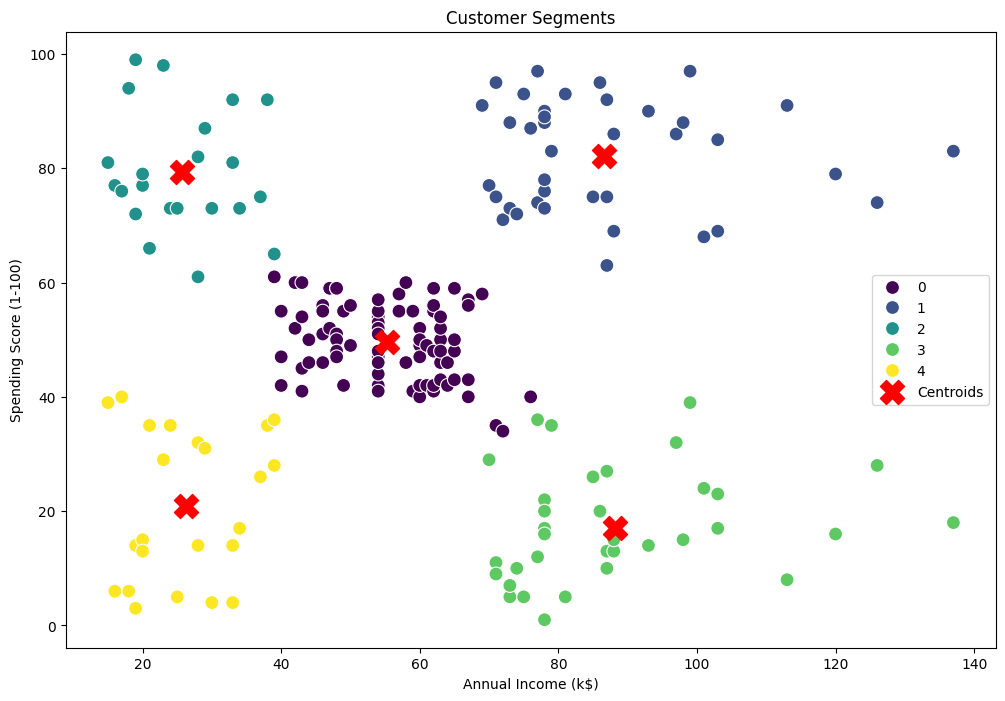

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the cluster labels to your original DataFrame (optional but good practice)
# Note: We use the original, unscaled 'X' for plotting so the axes are in their original units.
X['Cluster'] = cluster_prediction

# Get the coordinates of the cluster centers (centroids) in original scale
centroids = original_centroids

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=X, palette='viridis', s=100, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [14]:
for i in range(5):
    cluster_data = X[X['Cluster'] == i]
    print(f"Average Spending Score for Cluster {i}:")
    print(cluster_data[['Spending Score (1-100)']].mean())
    print("\n")

Average Spending Score for Cluster 0:
Spending Score (1-100)    49.518519
dtype: float64


Average Spending Score for Cluster 1:
Spending Score (1-100)    82.128205
dtype: float64


Average Spending Score for Cluster 2:
Spending Score (1-100)    79.363636
dtype: float64


Average Spending Score for Cluster 3:
Spending Score (1-100)    17.114286
dtype: float64


Average Spending Score for Cluster 4:
Spending Score (1-100)    20.913043
dtype: float64


